Vishal Kumar
226101005

**[1.A] Naïve-Bayes Classification by generating Likelihood

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import pandas as pd

# Load the MiniBooNE particle dataset
inputFile = 'MiniBooNE_PID.txt'

# Read the file using read_csv with custom delimiter and skiprows
xy_original_df = pd.read_csv(inputFile, delimiter='\s+', skiprows=1, header=None, names=["attr" + str(i) for i in range(1, 51)], index_col=False)

# Set the target variable column to 0 initially
xy_original_df['targetVar'] = 0

# Set the target variable values for the first 'signal_rec' rows to 1
xy_original_df.iloc[:signal_rec, -1] = 1


In [9]:
xy_original_df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,targetVar
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996,1
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621,1
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901,1
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990,1
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893,1


In [10]:
xy_original_df.groupby('targetVar').size()

targetVar
0    93565
1    36499
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the data into features and target
X = xy_original_df.iloc[:, :-1]
y = xy_original_df.iloc[:, -1]

validation_size = 0.30

# Use train_test_split function to split the data into train and test sets
x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=validation_size, random_state=None)

# Concatenate the features and target for the train set into a single DataFrame
xy_train_df = pd.concat([x_train_df, y_train_df], axis=1)

# Print the shapes of the original and train/test DataFrames
print("xy_original_df.shape: {} xy_train_df.shape: {}".format(xy_original_df.shape, xy_train_df.shape))
print("x_train_df.shape: {} y_train_df.shape: {}".format(x_train_df.shape, y_train_df.shape))
print("x_test_df.shape: {} y_test_df.shape: {}".format(x_test_df.shape, y_test_df.shape))


xy_original_df.shape: (130064, 51) xy_train_df.shape: (91044, 51)
x_train_df.shape: (91044, 50) y_train_df.shape: (91044,)
x_test_df.shape: (39020, 50) y_test_df.shape: (39020,)


In [13]:
import numpy as np

# Finalize the training and testing datasets for the modeling activities
x_train = x_train_df.to_numpy()
y_train = y_train_df.to_numpy()
x_test = x_test_df.to_numpy()
y_test = y_test_df.to_numpy()

# Print the shapes of the training and testing datasets
print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))
print("x_test.shape: {} y_test.shape: {}".format(x_test.shape, y_test.shape))


x_train.shape: (91044, 50) y_train.shape: (91044,)
x_test.shape: (39020, 50) y_test.shape: (39020,)


**(a). Using Single Gaussian

In [15]:
def fit(X, y):
    classes = np.unique(y)
    means = np.zeros((len(classes), X.shape[1]))
    stds = np.zeros((len(classes), X.shape[1]))
    priors = np.zeros(len(classes))

    for i, c in enumerate(classes):
        X_c = X[y == c]
        means[i, :] = X_c.mean(axis=0)
        stds[i, :] = X_c.std(axis=0)
        priors[i] = X_c.shape[0] / float(X.shape[0])

    return means, stds, priors

In [16]:
means, stds, priors = fit(x_train, y_train)

In [17]:
def gaussian_pdf(X, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((X - mean) / std)**2)

In [18]:
def predict(X, means, stds, priors):
    posteriors = np.zeros((X.shape[0], len(priors)))

    for i, prior in enumerate(np.log(priors)):
        posterior = np.sum(np.log(gaussian_pdf(X, means[i, :], stds[i, :])), axis=1)
        posteriors[:, i] = posterior + prior

    return np.argmax(posteriors, axis=1)

In [19]:
y_pred= predict(x_test, means, stds, priors)

/tmp/ipykernel_1076757/4057431696.py:5: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(gaussian_pdf(X, means[i, :], stds[i, :])), axis=1)


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.00      0.01     28117
           1       0.28      1.00      0.44     10903

    accuracy                           0.28     39020
   macro avg       0.63      0.50      0.22     39020
weighted avg       0.78      0.28      0.13     39020



**(b). Gaussian Mixture Model (GMM)**

In [21]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal

In [22]:
n_features = x_train.shape[1]  # number of features in the data
classes = np.unique(y_train)

In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report

# Create an empty list to store accuracies
accuracies = []

# Loop through different number of modes (components)
for modes in range(1, 11):
    models = {}
    for c in classes:
        Xc = x_train[y_train == c]
        model = GaussianMixture(n_components=modes, covariance_type='spherical', random_state=123)
        model.fit(Xc)
        models[c] = {
            'means': model.means_,
            'covs': model.covariances_,
            'priors': float(len(Xc)) / len(x_train)
        }

    # Compute likelihoods and predict labels for test data
    y_pred = []
    for x in x_test:
        posteriors = np.zeros(len(classes))
        for i, c in enumerate(classes):
            likelihoods = np.zeros(modes)
            for j in range(modes):
                likelihoods[j] = multivariate_normal.pdf(x, mean=models[c]['means'][j], cov=models[c]['covs'][j])
            posteriors[i] = np.sum(likelihoods) * models[c]['priors']
        y_pred.append(classes[np.argmax(posteriors)])
        
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracies.append(report['accuracy'])
    print('modes = ', modes)
    print(classification_report(y_test, y_pred))


modes =  1
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     28117
           1       0.79      0.47      0.59     10903

    accuracy                           0.82     39020
   macro avg       0.81      0.71      0.73     39020
weighted avg       0.81      0.82      0.80     39020

modes =  2
              precision    recall  f1-score   support

           0       0.88      0.76      0.82     28117
           1       0.55      0.74      0.63     10903

    accuracy                           0.76     39020
   macro avg       0.72      0.75      0.72     39020
weighted avg       0.79      0.76      0.77     39020

modes =  3
              precision    recall  f1-score   support

           0       0.85      0.73      0.79     28117
           1       0.49      0.67      0.57     10903

    accuracy                           0.71     39020
   macro avg       0.67      0.70      0.68     39020
weighted avg       0.75      0.71      0.

/home/vishal/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/vishal/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


modes =  9
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     28117
           1       0.68      0.67      0.68     10903

    accuracy                           0.82     39020
   macro avg       0.78      0.78      0.78     39020
weighted avg       0.82      0.82      0.82     39020



/home/vishal/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


modes =  10
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     28117
           1       0.64      0.70      0.67     10903

    accuracy                           0.81     39020
   macro avg       0.76      0.77      0.77     39020
weighted avg       0.81      0.81      0.81     39020



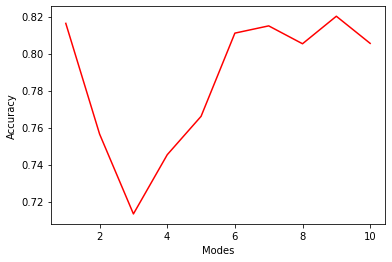

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Convert accuracies to numpy array for plotting
modes = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # X-axis points
accuracy = np.array(accuracies)  # Y-axis points

# Plot the chart
plt.plot(modes, accuracy , color = 'red')
plt.xlabel("Modes")  # Add X-axis label
plt.ylabel("Accuracy")  # Add Y-axis label

plt.show()  # Display the plot


**[1.B] Iris dataset for multiclass classification and repeat the above experiment** 

In [33]:
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=None)
means, stds, priors = fit(x_train, y_train)
y_pred= predict(x_test, means, stds, priors)

report=classification_report(y_test, y_pred,output_dict=True)
print(report['accuracy'])
print(classification_report(y_test, y_pred))

0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.93      0.93      0.93        29
           2       0.94      0.94      0.94        34

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



In [34]:
n_features = x_train.shape[1]  # number of features in the data
classes = np.unique(y_train)

**[2] Application  of K-Means  Clustering in  image  segmentation.**

In [35]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import multivariate_normal

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
validation_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=None)

# Define list of classes
classes = np.unique(y_train)

# Fit a Gaussian Mixture Model for each class with varying number of modes
accuracies = []
for modes in range(1, 11):
    models = {}
    for c in classes:
        Xc = x_train[y_train == c]
        model = GaussianMixture(n_components=modes, covariance_type='spherical', random_state=123)
        model.fit(Xc)
        models[c] = {
            'means': model.means_,
            'covs': model.covariances_,
            'priors': float(len(Xc)) / len(x_train)
        }

    # Compute likelihoods and predict labels for test data
    y_pred = []
    for x in x_test:
        posteriors = np.zeros(len(classes))
        for i, c in enumerate(classes):
            likelihoods = np.zeros(modes)
            for j in range(modes):
                likelihoods[j] = multivariate_normal.pdf(x, mean=models[c]['means'][j], cov=models[c]['covs'][j])
            posteriors[i] = np.sum(likelihoods) * models[c]['priors']
        y_pred.append(classes[np.argmax(posteriors)])

    # Calculate accuracy and print classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracies.append(report['accuracy'])
    print('modes =', modes)
    print(classification_report(y_test, y_pred))


modes = 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

modes = 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

modes = 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96  

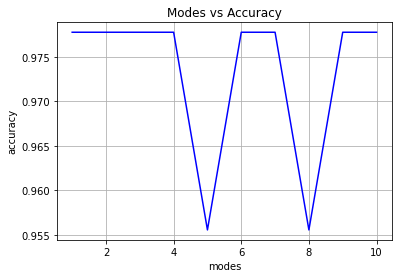

In [38]:
import matplotlib.pyplot as plt
import numpy as np

modes = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # X-axis points
accuracy = np.array(accuracies)  # Y-axis points

plt.plot(modes, accuracy , color = 'blue')  # Plot the chart
plt.xlabel("modes")  # add X-axis label
plt.ylabel("accuracy")  # add Y-axis label
plt.title("Modes vs Accuracy")  # add title
plt.grid(True)  # add grid
plt.show()  # display the plot


**[3.A] Write a function 𝑔𝑒𝑛𝑒𝑟𝑎𝑡𝑒𝑃𝑜𝑖𝑛𝑡𝐹𝑟𝑜𝑚𝑅𝑎𝑛𝑑𝑜𝑚𝐶𝑙𝑢𝑠𝑡𝑒𝑟( ) thatrandomly generates a point in 𝑹i.**

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

In [40]:
# load the image
image = io.imread('KMeans_Seg_Input_Image_1.jpg')

# reshape the image data to an array of pixels
pixel_values = image.reshape((-1, 3))

In [41]:
Ns=np.arange(5,51,5)

In [42]:
def plot_img():
    # plot the original and clustered images side by side
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(new_image)
    ax[1].set_title('Clustered Image')
    ax[1].axis('off')
    plt.show()

cluster size, N = 5


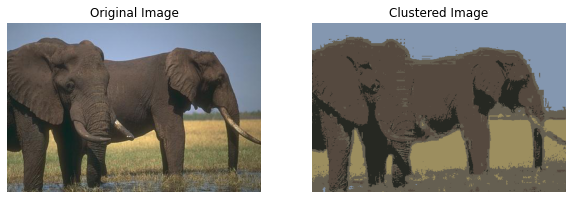

cluster size, N = 10


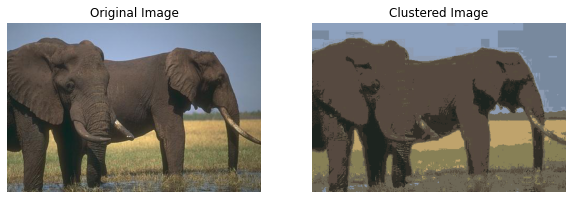

cluster size, N = 15


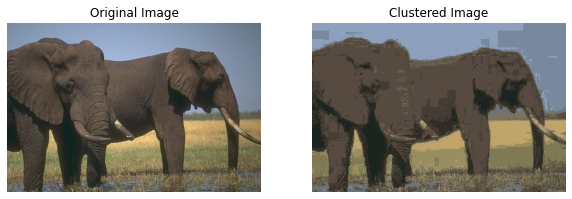

cluster size, N = 20


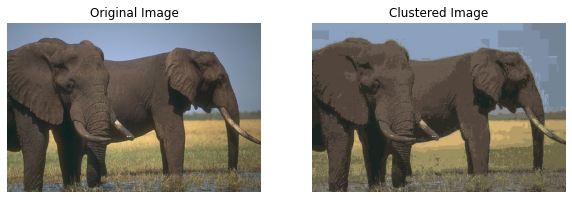

cluster size, N = 25


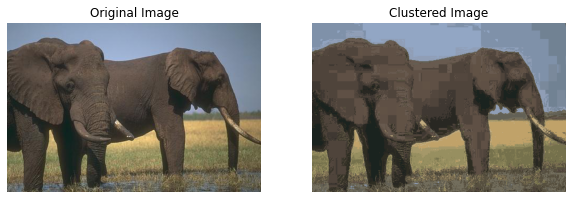

cluster size, N = 30


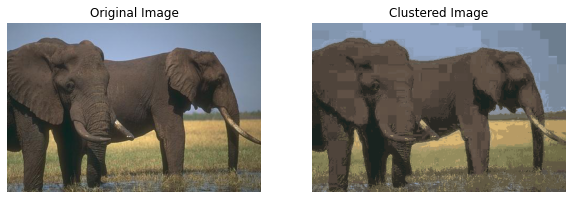

cluster size, N = 35


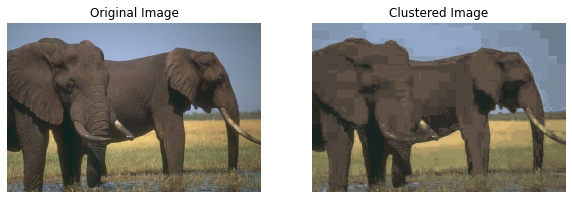

cluster size, N = 40


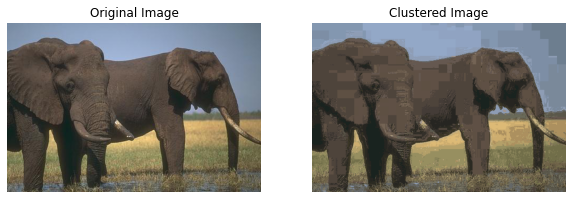

/home/vishal/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


cluster size, N = 45


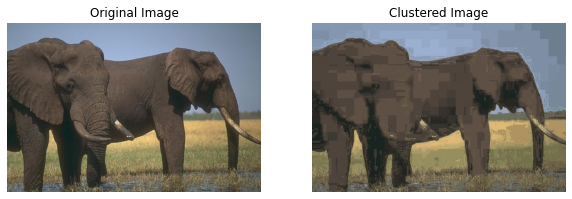

cluster size, N = 50


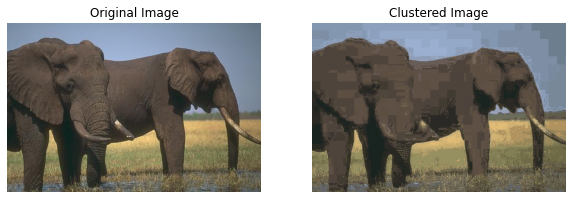

In [44]:
from sklearn.mixture import GaussianMixture

for N in Ns:
    # perform Gaussian Mixture Model clustering with N components
    gmm = GaussianMixture(n_components=N, random_state=0).fit(pixel_values)
    # get the cluster means as the centroids
    centroids = gmm.means_
    # predict the cluster labels for each pixel
    labels = gmm.predict(pixel_values)
    # replace each pixel color with the nearest cluster centroid
    new_pixel_values = centroids[labels].astype(np.uint8)
    # reshape the pixel values back to the original image shape
    new_image = new_pixel_values.reshape(image.shape)
    print('cluster size, N = ' + str(N))
    plot_img()


In [56]:
# load the image
image = io.imread('KMeans_Seg_Input_Image_2.jpg')

# reshape the image data to an array of pixels
pixel_values = image.reshape((-1, 3))

In [57]:
Ns=np.arange(5,51,5)

In [58]:
def plot_img():
    # plot the original and clustered images side by side
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(new_image)
    ax[1].set_title('Clustered Image')
    ax[1].axis('off')
    plt.show()

cluster size, N = 5


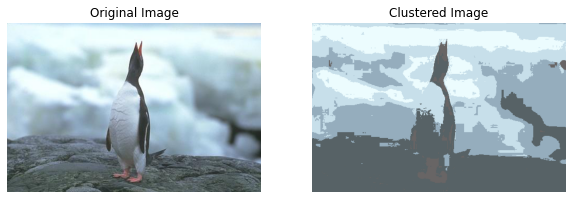

cluster size, N = 10


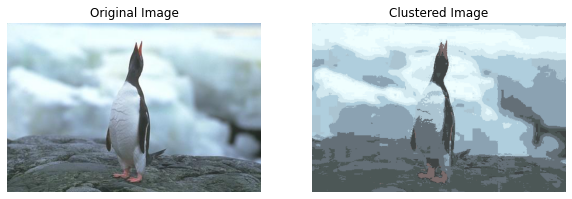

cluster size, N = 15


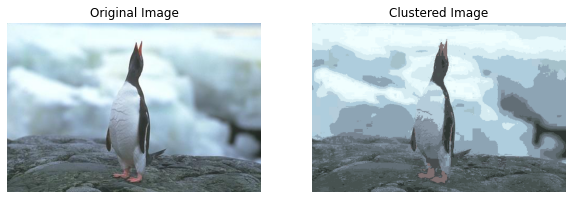

cluster size, N = 20


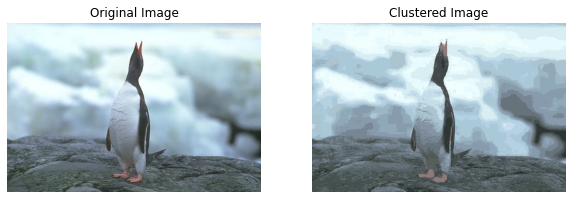

cluster size, N = 25


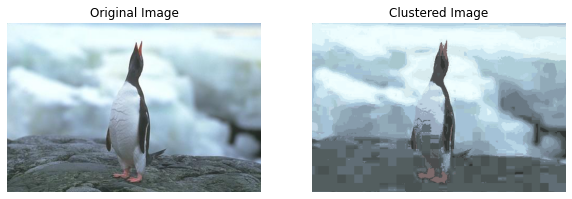

cluster size, N = 30


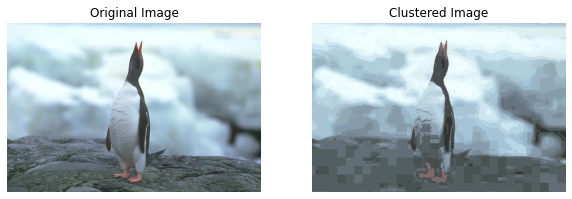

cluster size, N = 35


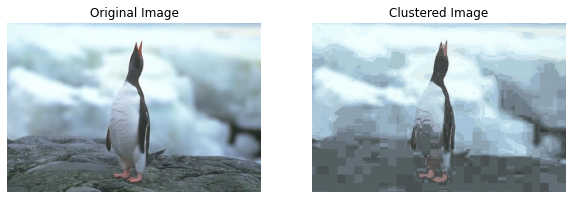

cluster size, N = 40


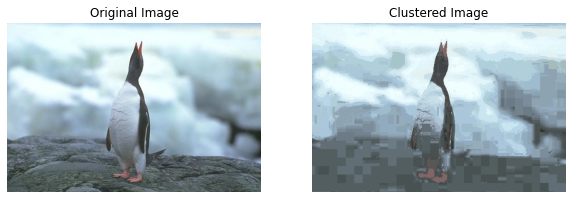

cluster size, N = 45


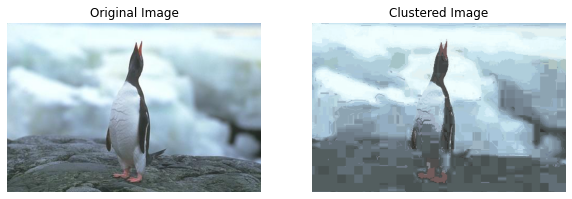

cluster size, N = 50


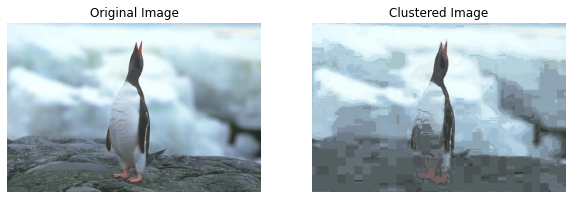

In [59]:
for N in Ns:
    # perform Gaussian Mixture Model clustering with N components
    gmm = GaussianMixture(n_components=N, random_state=0).fit(pixel_values)
    # get the cluster means as the centroids
    centroids = gmm.means_
    # predict the cluster labels for each pixel
    labels = gmm.predict(pixel_values)
    # replace each pixel color with the nearest cluster centroid
    new_pixel_values = centroids[labels].astype(np.uint8)
    # reshape the pixel values back to the original image shape
    new_image = new_pixel_values.reshape(image.shape)
    print('cluster size, N = ' + str(N))
    plot_img()

In [45]:
import random
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.patches as patches

In [46]:
N = 17 # number of circles
cent_red= [(0, 0, 10) , (0, 50, 15) , (50, 0, 15) , (0,-50, 15) , (-50, 0, 15) , (35, 35, 15), (35,-35, 15) , (-35, 35, 15) , (-35,-35, 15) , (0, 100, 20) , (100, 0, 20) , (0,-100, 20) , (-100, 0, 20) , (70, 70, 20) , (70,-70, 20) , (-70, 70, 20) , (-70,-70, 20)]

In [47]:
def generatePointFromRandomCluster():
    # Choose a random cluster
    cluster_idx = np.random.randint(0, N-1)
    # Choose a random point within the cluster
    center = (cent_red[cluster_idx][0], cent_red[cluster_idx][1])
    cov = np.diag([cent_red[cluster_idx][2]**2, cent_red[cluster_idx][2]**2])
    point = np.random.multivariate_normal(center, cov)
    return point


In [48]:
R_i= generatePointFromRandomCluster()

In [49]:
print(R_i)

[ 30.28792992 -82.0615125 ]


**[3.B] Perform incremental clustering with default variance 𝑣d= 10 and Chebychevinequality threshold 𝜆= 3.Asthe number of clusters increase beyond 50, drop the clusterwith lowest weight value (𝜋), so that at any given iteration, there are amaximum of 𝐾= 50 clusters.Plot the clusters as differently coloured ellipses after every 100iterations.**

In [50]:
K = 50  # maximum number of clusters
vd = 10  # default variance
lamda = 3  # Chebychev inequality threshold
n_iterations = 1001  # total number of iterations

In [51]:
X=[]
for i in range(n_iterations):
    X.append(np.array(list(generatePointFromRandomCluster())))

In [54]:
def incrementalClustering(n_iterations, v_d, lam):
    clusters = []
    # initialize first cluster
    first_point = X[0]
    clusters.append({'mean': first_point, 'cov': np.eye(len(first_point)), 'pi': 1})
    for i in range(n_iterations):
        x=np.array(list(generatePointFromRandomCluster()))
#         x = X[i]
        distances = cdist([x], [c['mean'] for c in clusters], 'mahalanobis', VI=np.eye(len(x))*v_d)
        if np.min(distances) > lam:
            # create a new cluster for the point
            clusters.append({'mean': x, 'cov': np.eye(len(x)), 'pi': 1})
        else:
            # add the point to the closest cluster
            cluster_idx = np.argmin(distances)
            cluster = clusters[cluster_idx]
            n = cluster['pi']
            new_mean = np.array(((n * cluster['mean']) + x)) / (n+1)
            new_cov = ((n-1) / n) * cluster['cov'] + ((1/n) * np.outer(x - cluster['mean'], x - cluster['mean']))
            new_pi = n / (n+1)
            clusters[cluster_idx] = {'mean': new_mean, 'cov': new_cov, 'pi': new_pi}
        # drop the cluster with lowest weight if the number of clusters is greater than K
        if len(clusters) > 50:
            min_pi_idx = np.argmin([c['pi'] for c in clusters])
            clusters.pop(min_pi_idx)
        # plot the clusters after every 100 iterations
#         print(i)
        if i % 100 == 0:
            plt.figure(figsize=(8,8))
            for j, c in enumerate(clusters):
                eigenvalues, eigenvectors = np.linalg.eig(c['cov'])
                angle = np.degrees(np.arctan2(*eigenvectors[1]))
                ellipse = patches.Ellipse(xy=c['mean'], width=6*np.sqrt(eigenvalues[0]), height=6*np.sqrt(eigenvalues[1]), angle=angle, alpha=c['pi'])
                ellipse.set_facecolor(np.random.rand(3))
                plt.gca().add_artist(ellipse)
#             plt.scatter(X[:,0], X[:,1], s=5, color='black')
            plt.xlim(-50, 50)
            plt.ylim(-50, 50)
            plt.title(f"Iteration {i}")
            plt.show()

    return clusters

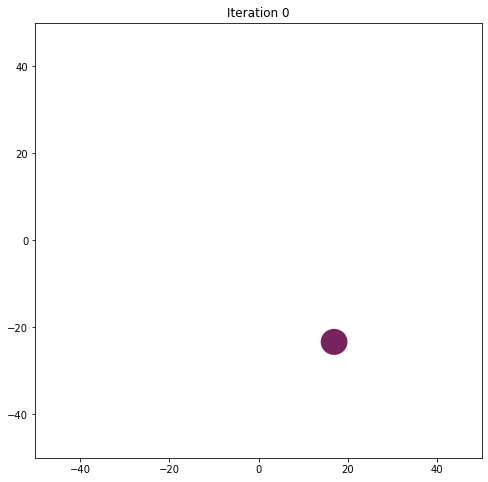

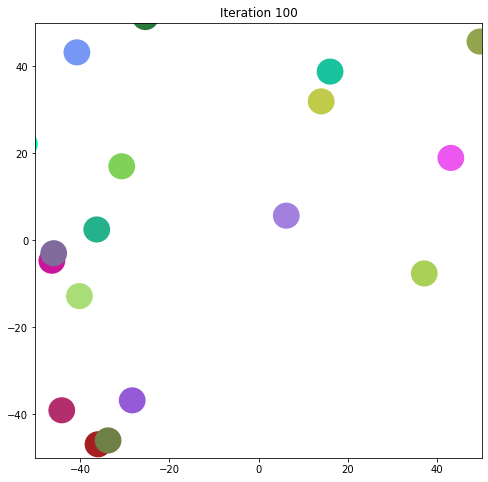

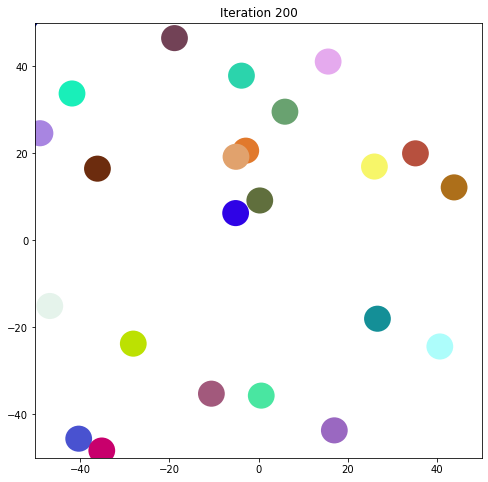

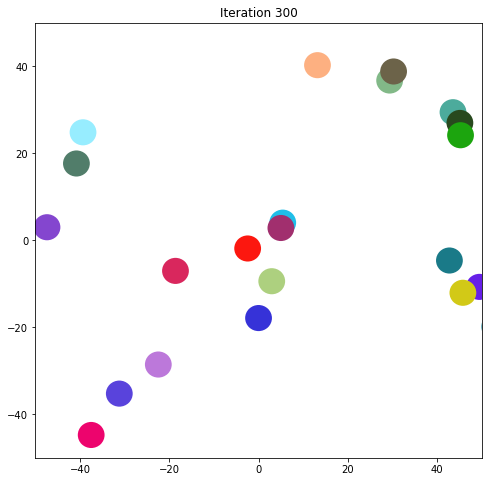

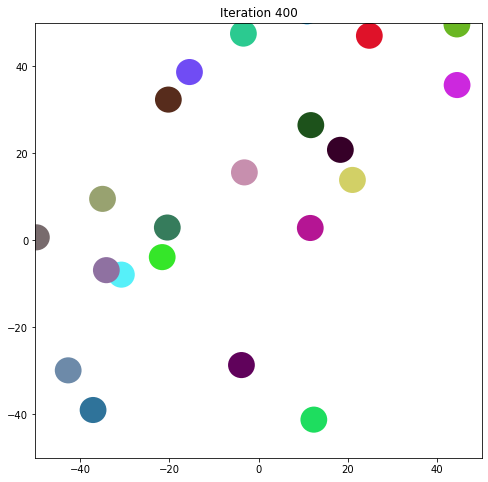

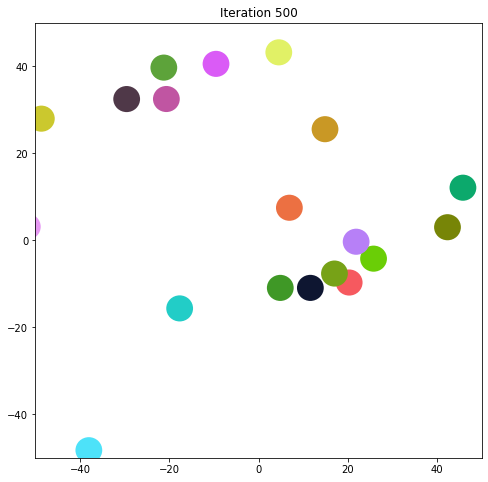

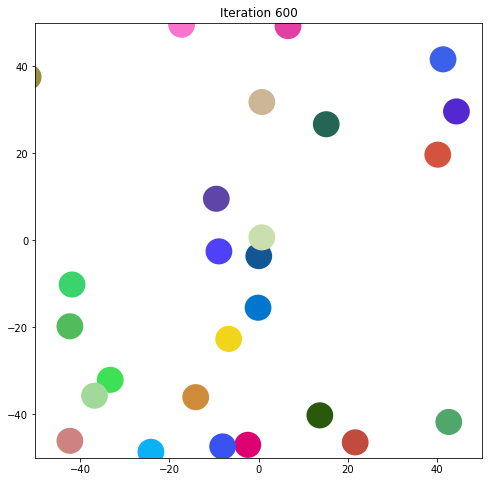

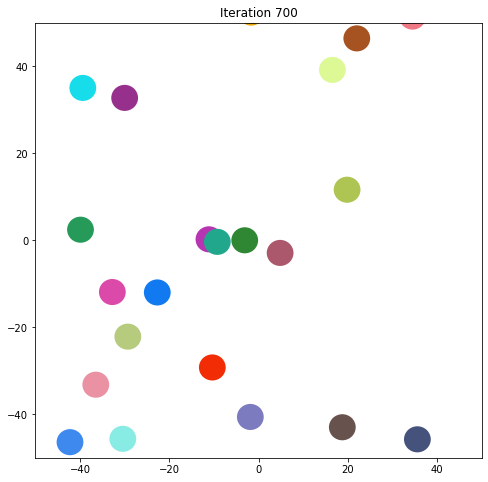

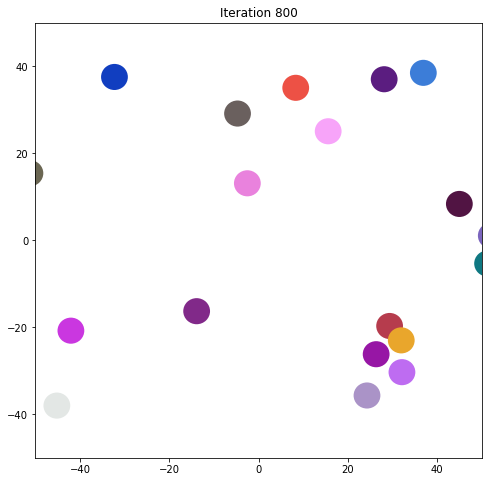

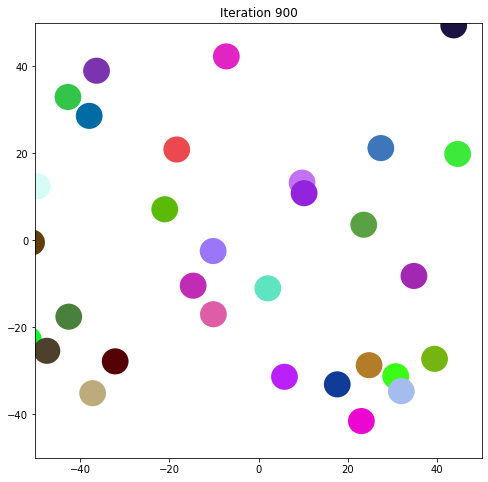

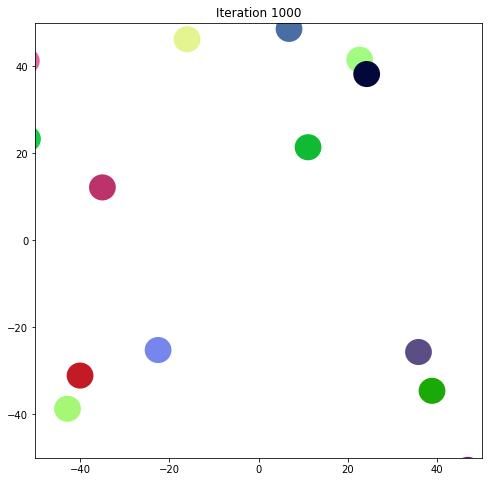

In [55]:
clusters=incrementalClustering(n_iterations, vd, lamda)